In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product

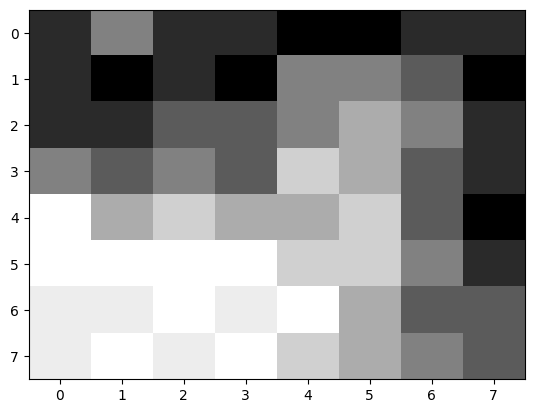

In [81]:
img = np.array([[6,4,6,6,7,7,6,6],
[6,7,6,7,4,4,5,7],
[6,6,5,5,4,3,4,6],
[4,5,4,5,2,3,5,6],
[0,3,2,3,3,2,5,7],
[0,0,0,0,2,2,4,6],
[1,1,0,1,0,3,5,5],
[1,0,1,0,2,3,4,5],], np.int32)
plt.figure()
plt.imshow(img, interpolation='nearest', cmap=plt.cm.Greys, vmin=0, vmax=7, aspect="auto")


In [82]:
def changer (image):
    if (np.amax(image) - np.amin(image)) < 3 :
        image = np.average(image)
    else :
        return splitter(image)

    return image


def splitter(image):
    (h, w) = image.shape[:2]

    if (h == 1) | (w == 1):
        return image
        
    (cX, cY) = (w // 2, h // 2)

    topLeft = image[0:cY, 0:cX]
    topRight = image[0:cY, cX:w]
    bottomLeft = image[cY:h, 0:cX]
    bottomRight = image[cY:h, cX:w]

    image[0:cY, 0:cX] = changer(topLeft)
    image[0:cY, cX:w] = changer(topRight)
    image[cY:h, 0:cX ]= changer(bottomLeft)
    image[cY:h, cX:w] = changer(bottomRight)

    
    return image


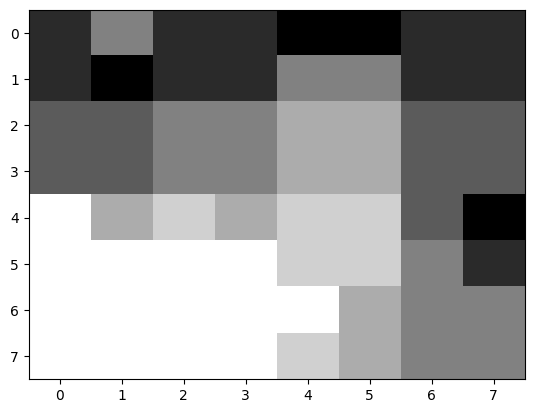

In [83]:
plt.figure()
plt.imshow(splitter(img), interpolation='nearest', cmap=plt.cm.Greys, vmin=0, vmax=7, aspect="auto")